Because we don't have the ucimlrepo we have to download it with the command   pip install

In [4]:
pip install ucimlrepo

we will import the important libraries to continue

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from ucimlrepo import fetch_ucirepo


id = 109 (see the machine learning respository, https://archive.ics.uci.edu/dataset/109/wine)

In [6]:
wine = fetch_ucirepo(id = 109)

#features of the data
x = wine.data.features

#target data
y = wine.data.targets



In [7]:
print(wine.metadata)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [8]:
print(wine.variables)

                            name     role         type demographic  \
0                          class   Target  Categorical        None   
1                        Alcohol  Feature   Continuous        None   
2                      Malicacid  Feature   Continuous        None   
3                            Ash  Feature   Continuous        None   
4              Alcalinity_of_ash  Feature   Continuous        None   
5                      Magnesium  Feature      Integer        None   
6                  Total_phenols  Feature   Continuous        None   
7                     Flavanoids  Feature   Continuous        None   
8           Nonflavanoid_phenols  Feature   Continuous        None   
9                Proanthocyanins  Feature   Continuous        None   
10               Color_intensity  Feature   Continuous        None   
11                           Hue  Feature   Continuous        None   
12  0D280_0D315_of_diluted_wines  Feature   Continuous        None   
13                  

print the data

In [9]:
x

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


print the target data

In [10]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


to know a little bit more about the features that the variable x has we will output all the columns that x has

In [11]:
x.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')

now we will see the unique values of the target variables and how many times each value of those variables are shown

In [12]:
np.unique(y, return_counts=True)

(array([1, 2, 3]), array([59, 71, 48]))

we check if the x variable has any null values

In [13]:
x.isnull().sum()

,0
Alcohol,0
Malicacid,0
Ash,0
Alcalinity_of_ash,0
Magnesium,0
Total_phenols,0
Flavanoids,0
Nonflavanoid_phenols,0
Proanthocyanins,0
Color_intensity,0


a little bit if descreptive statistics

In [14]:
x.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


plot of the y values in percentage

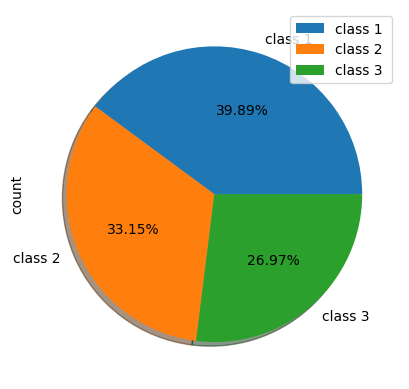

In [15]:
y.value_counts().plot(kind='pie',shadow =True, autopct='%.2f%%' , labels=['class 1 ', 'class 2 ', 'class 3'])
plt.legend()
plt.show()

the correlation map of the features of the x variable

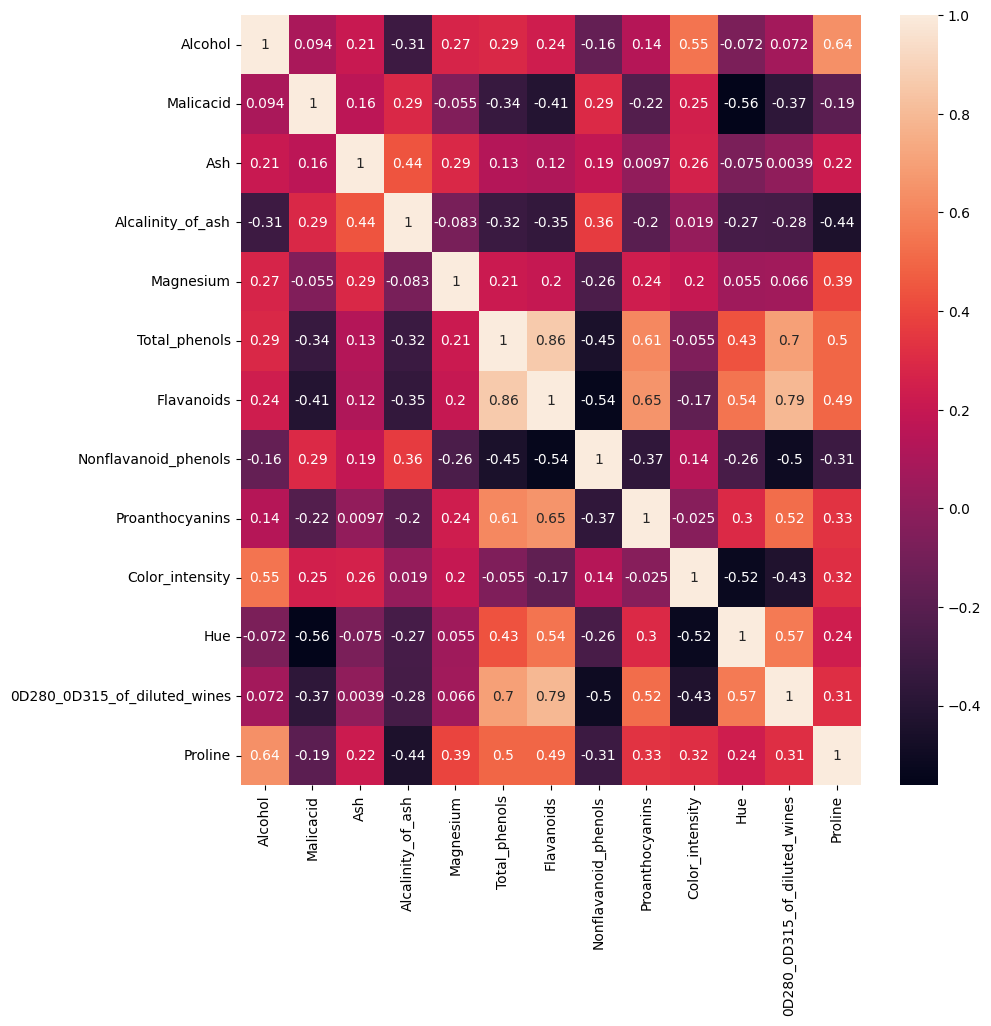

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(), annot=True)
plt.show()

we will remove some columns that don't have good correlation

In [17]:
x = x.drop(['Ash','Alcalinity_of_ash','Magnesium','Color_intensity','Hue','Malicacid'],axis = 1)

In [18]:
x

,Alcohol,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,0D280_0D315_of_diluted_wines,Proline
0,14.23,2.80,3.06,0.28,2.29,3.92,1065
1,13.20,2.65,2.76,0.26,1.28,3.40,1050
2,13.16,2.80,3.24,0.30,2.81,3.17,1185
3,14.37,3.85,3.49,0.24,2.18,3.45,1480
4,13.24,2.80,2.69,0.39,1.82,2.93,735
...,...,...,...,...,...,...,...
173,13.71,1.68,0.61,0.52,1.06,1.74,740
174,13.40,1.80,0.75,0.43,1.41,1.56,750
175,13.27,1.59,0.69,0.43,1.35,1.56,835
176,13.17,1.65,0.68,0.53,1.46,1.62,840


spliting the data to training and test data

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=10)

#scaling the training and test data
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [78]:
x_train.shape

(142, 7)

In [79]:
x_test.shape

(36, 7)

In [80]:
y_train.shape

(142, 1)

importing machine learning models like
* Logistic Regression
* Gaussian Naive Bayes
* K-nearest neighbors

And Metrics
* Accuracy
* Precision
* Recall
* F1-Score

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as accuracy , precision_score as precision , recall_score as recall , f1_score as f1

creating a metrics matrix

In [82]:
def conf_matrix(true_classes,predicted_classes):
    result = {
        'accuracy':accuracy(true_classes,predicted_classes),
        'precision':precision(true_classes,predicted_classes,average='weighted'),
        'recall': recall(true_classes,predicted_classes,average='weighted'),
        'f1':f1(true_classes,predicted_classes,average='weighted')
    }
    return result


training the model and evaluating the models with test and training data

In [83]:
metrics = ['accuracy','precision','recall','f1']
models = {'Logistic Regression':LogisticRegression().fit(x_train,y_train),'Support Vector Machine': SVC().fit(x_train,y_train),'Naive Bayes':GaussianNB().fit(x_train,y_train),'K-Nearest Neighbors':KNeighborsClassifier().fit(x_train,y_train)}
model_evaluation = {'Logistic Regression-Train':[], 'Logistic Regression-Test':[],
                    'Support Vector Machine-Train':[], 'Support Vector Machine-Test':[],
                    'Naive Bayes-Train':[], 'Naive Bayes-Test':[],
                    'K-Nearest Neighbors-Train':[], 'K-Nearest Neighbors-Test':[]}

for model_name , model in models.items():
  for metric in metrics:
    model_train = conf_matrix(y_train,model.predict(x_train))
    model_test = conf_matrix(y_test,model.predict(x_test))
    model_evaluation[model_name+'-Train'].append(model_train[metric])
    model_evaluation[model_name+'-Test'].append(model_test[metric])

result = pd.DataFrame(model_evaluation,index = metrics)
result

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

,Logistic Regression-Train,Logistic Regression-Test,Support Vector Machine-Train,Support Vector Machine-Test,Naive Bayes-Train,Naive Bayes-Test,K-Nearest Neighbors-Train,K-Nearest Neighbors-Test
accuracy,0.971831,0.833333,0.992958,0.833333,0.971831,0.805556,0.978873,0.833333
precision,0.971856,0.904762,0.993099,0.904762,0.973054,0.879509,0.979597,0.889277
recall,0.971831,0.833333,0.992958,0.833333,0.971831,0.805556,0.978873,0.833333
f1,0.971766,0.839394,0.992960,0.839394,0.971591,0.805477,0.978750,0.833862


As we can see our model has overfitting so to avoid the overfitting we will use cross validation

<ipython-input-84-a4e27d0ccae5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(result, rotation=45 , ha = 'right')
<ipython-input-84-a4e27d0ccae5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(result, rotation=45, ha = 'right')
<ipython-input-84-a4e27d0ccae5>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(result, rotation=45, ha = 'right')
<ipython-input-84-a4e27d0ccae5>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(result, rotation=45, ha = 'right')


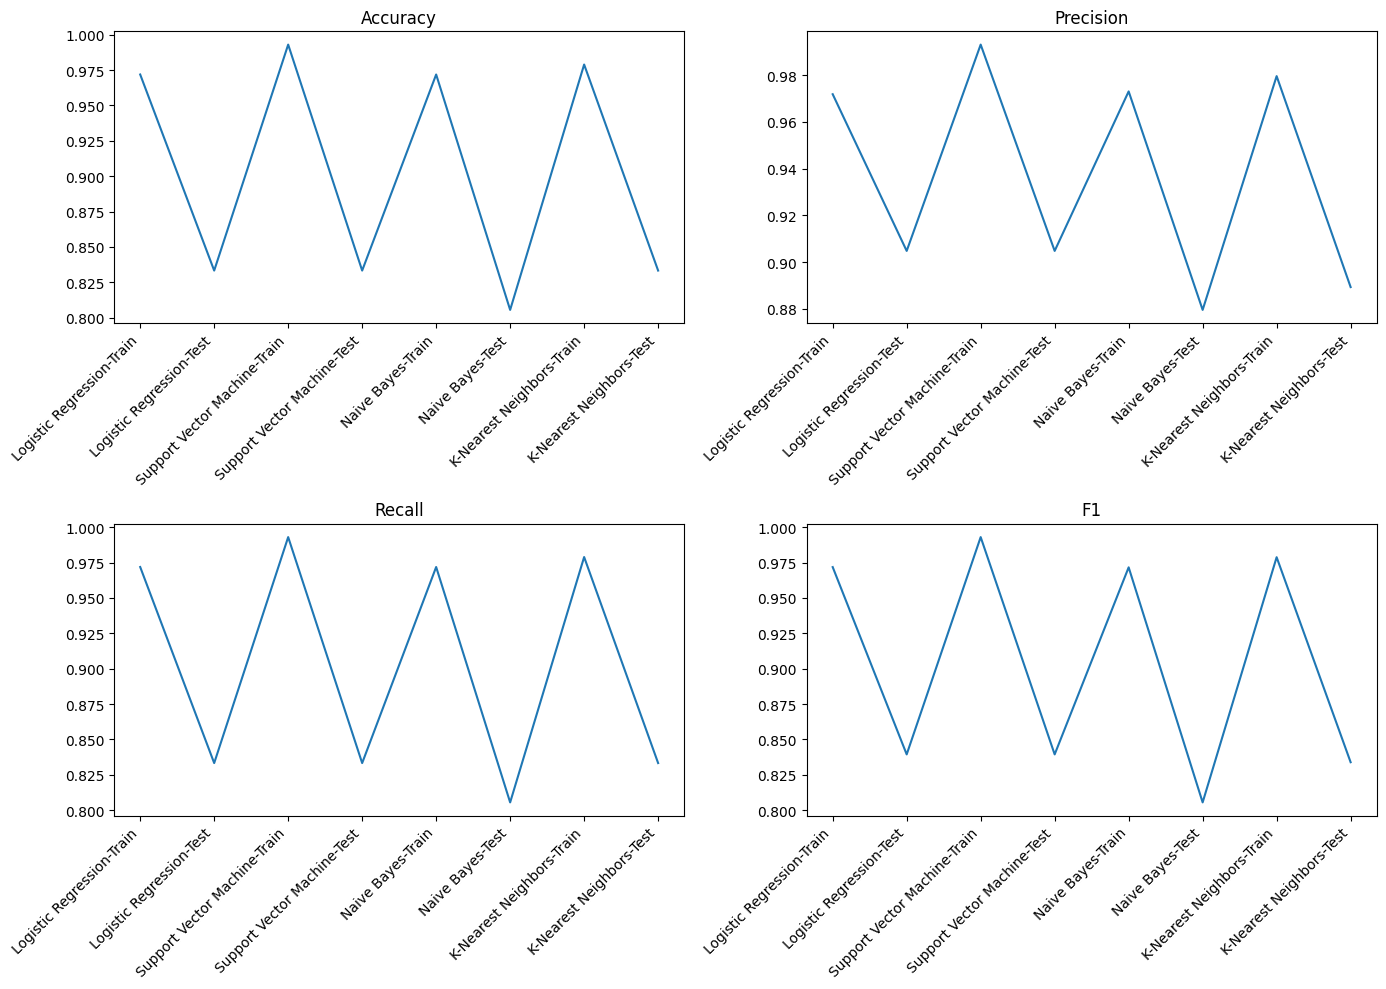

In [84]:
fig , ax = plt.subplots(2,2,figsize=(14,10))

#accuracy plot
ax[0,0].plot(result.loc['accuracy'])
ax[0,0].set_title('Accuracy')
ax[0,0].set_xticklabels(result, rotation=45 , ha = 'right')

#precision plot
ax[0,1].plot(result.loc['precision'])
ax[0,1].set_title('Precision')
ax[0,1].set_xticklabels(result, rotation=45, ha = 'right')

#recall plot
ax[1,0].plot(result.loc['recall'])
ax[1,0].set_title('Recall')
ax[1,0].set_xticklabels(result, rotation=45, ha = 'right')

#f1 score plot
ax[1,1].plot(result.loc['f1'])
ax[1,1].set_title('F1')
ax[1,1].set_xticklabels(result, rotation=45, ha = 'right')

#adjust layout
plt.tight_layout()

plt.show()


using cross validation to see the results and deal with overfitting

In [85]:
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as accuracy , precision_score as precision , recall_score as recall , f1_score as f1
from sklearn.model_selection import cross_val_predict , KFold
from sklearn.preprocessing import StandardScaler
wine = fetch_ucirepo(id = 109)

X = wine.data.features
Y = wine.data.targets.to_numpy().ravel()
scaler = StandardScaler()
X = scaler.fit_transform(X)

models = {'Logistic Regression': LogisticRegression(max_iter=50), 'Support Vector Machine': SVC(), 'Naive Bayes': GaussianNB(), 'K-Nearest Neighbors': KNeighborsClassifier()}

for model_name , model in models.items():
  cv = KFold(n_splits=5, shuffle=True, random_state=4)
  y_pred = cross_val_predict(model, X, Y, cv=cv)
  print(model_name)
  print(conf_matrix(Y,y_pred))


Logistic Regression
{'accuracy': 0.9719101123595506, 'precision': 0.9722599575840651, 'recall': 0.9719101123595506, 'f1': 0.9717874929756182}
Support Vector Machine
{'accuracy': 0.9887640449438202, 'precision': 0.9888786975464343, 'recall': 0.9887640449438202, 'f1': 0.9887689951398976}
Naive Bayes
{'accuracy': 0.9775280898876404, 'precision': 0.9775458808087357, 'recall': 0.9775280898876404, 'f1': 0.9774850231817683}
K-Nearest Neighbors
{'accuracy': 0.9662921348314607, 'precision': 0.9683891352706971, 'recall': 0.9662921348314607, 'f1': 0.9660916501432034}
